<a href="https://colab.research.google.com/github/jmacedo91/Statistics-With-Python-Alura/blob/main/Parte_4_Exercicio_Correla%C3%A7%C3%A3o_e_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estatística com Python Parte 4: Correlação e Regressão/dados_projeto.csv', sep = ';')

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [ ]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [ ]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

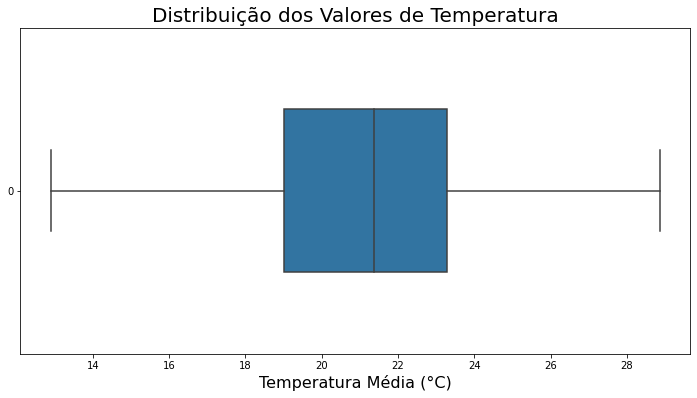

In [ ]:
ax = sns.boxplot(data = dados.X, orient = 'h', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Valores de Temperatura', fontsize = 20)
ax.set_xlabel('Temperatura Média (°C)', fontsize = 16)
ax = ax

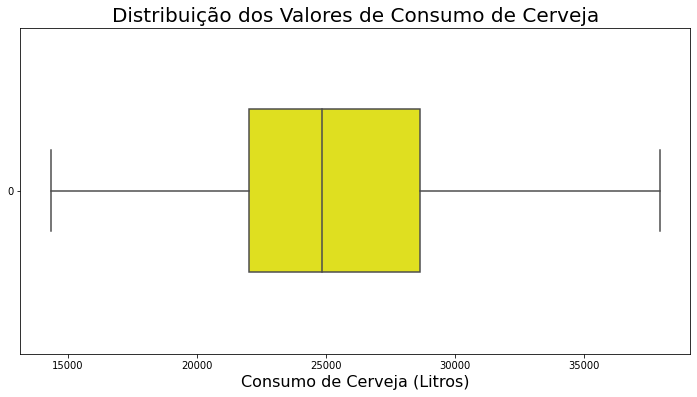

In [ ]:
ax = sns.boxplot(data = dados.Y, orient = 'h', width = 0.5, color = 'yellow')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos Valores de Consumo de Cerveja', fontsize = 20)
ax.set_xlabel('Consumo de Cerveja (Litros)', fontsize = 16)
ax = ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

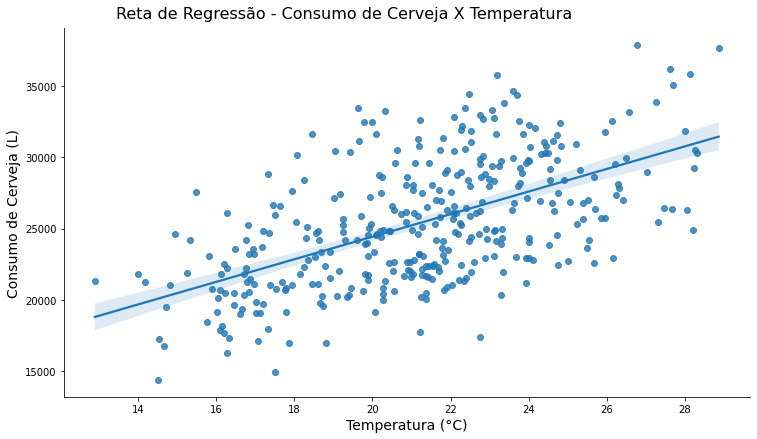

In [ ]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo de Cerveja X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (L)", fontsize=14)
ax = ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [ ]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Existe uma leve relação linear entre as variáveis.

É possível quantificar a intensidade dessa relação?

Resp.: Sim, através do coeficiente de correlação

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não é possível avaliar a causalidade apenas pela correlação.

### Prepare os dados para estimar um modelo de regressão linear simples

In [ ]:
Y = dados.Y
X = sm.add_constant(dados.X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.87e-33
Time:                        00:41:13   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [ ]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [ ]:
resultado_regressao.params

const    8528.907284
X         794.882537
dtype: float64

In [ ]:
beta1 = resultado_regressao.params[0]
beta2 = resultado_regressao.params[1]

In [ ]:
def consumo(T):
  c_T = beta1 + (beta2 * T)
  return c_T.round(2)

In [ ]:
consumo_42_graus = consumo(42)

In [ ]:
print(f'O consumo de cerveja estimado em um dia com temperatura média de 42 graus é igual a {consumo_42_graus} litros')

O consumo de cerveja estimado em um dia com temperatura média de 42 graus é igual a 41913.97 litros


In [ ]:
resultado_regressao.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [ ]:
dados['u'] = dados.Y - dados.Y_previsto
dados.head()

,Y,X,Y_previsto,u
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


In [ ]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Y,X,Y_previsto,u,Residuos
0,25461,27.30,30229.200544,-4768.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148,2556.108148
3,29799,23.98,27590.190521,2208.809479,2208.809479
4,28900,23.82,27463.009315,1436.990685,1436.990685


In [ ]:
dados.drop(['u'], axis = 1, inplace = True)
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

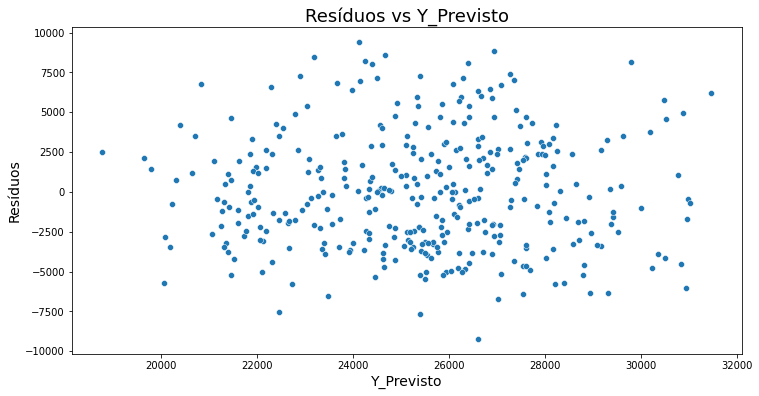

In [ ]:
ax = sns.scatterplot(data = dados, x = 'Y_previsto', y = 'Residuos')
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax = ax

### Obtenha o QQPlot dos resíduos

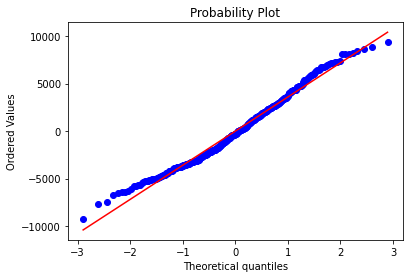

In [ ]:
(_, (_, _, _)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [ ]:
SQR = ((dados.Y_previsto - dados.Y_previsto.mean()) ** 2).sum()
SQR

2325899486.737787

In [ ]:
SQT = ((dados.Y - dados.Y.mean()) ** 2).sum()
SQT

7044294174.805479

In [ ]:
R2 = SQR / SQT
R2

0.3301820493324321

In [ ]:
resultado_regressao.rsquared

0.330182049332432

**Nesta aula, aprendemos:**

- A fixar o entendimento sobre correlação e regressão linear
- A aplicação das técnicas desenvolvidas no treinamento para a solução de problemas reais